In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = 200
plt.style.use('seaborn-whitegrid')

## Generate markdown

In [308]:
%run ../helper/generate_markdown.ipynb import generate_markdown_text
generate_markdown_text('11.Compare the aget distributions for each violation.')

'11. [Compare the aget distributions for each violation.](#-11.Compare-the-aget-distributions-for-each-violation.)'

# Standford Open Policing Project Data Analysis
1. [Create dataframe from imported data](#-1.Create-dataframe-from-imported-data)
2. [Exlore violations](#-2.Explore-violations)
    - i. [What are the top three violation types a driver is pulled over based on gender?](#-i.What-are-the-top-three-violation-types-a-driver-is-pulled-over-based-on-gender?)
    - ii. [Compare the violation type stats based on gender.](#-ii.Compare-the-violation-type-stats-based-on-gender.)
    - ii. [ii.Compare the violation type stats based on gender.](#-ii.Compare-the-violation-type-stats-based-on-gender.)
    - iii. [What is the relationship between gender and violation stops?](#-iii.What-is-the-relationship-between-gender-and-violation-stops?)
    - iv. [What is the percentage of police stops in which a search was conducted?](#-iv.What-is-the-percentage-of-police-stops-in-which-a-search-was-conducted?)
3. [How does pandas handle NULL values?](#-3.How-does-pandas-handle-NULL-values?)
4. [Find all stop events in which police conducted a frisk search.](#-4.Find-all-stop-events-in-which-police-conducted-a-frisk-search.)
5. [Find the year with the least number of stops.](#-5.Find-the-year-with-the-least-number-of-stops.)
6. [Find the peak hours for drug related stops.](#-6.Find-the-peak-hours-for-drug-related-stops.)
7. [What time do stops take place?](#-7.What-time-do-stops-take-place?)
8. [Replace the ambiguous data in stop_duration column with np.nan.](#-8.Replace-the-ambiguous-data-in-stop_duration-column-with-np.nan.)
    - i. [Using loc method.](#-i.Using-loc-method.)
    - ii. [Using replace.](#-ii.Using-replace.)
9. [Find the average stop_duration for each violation.](#-9.Find-the-average-stop_duration-for-each-violation.)
10. [Plot the findings.](#-10.Plot-the-findings.)
11. [Compare the aget distributions for each violation.](#-11.Compare-the-aget-distributions-for-each-violation.)


## 1.Create dataframe from imported data

In [309]:
police_df = pd.read_csv('../data/police_data.csv')
police_df.shape

(91741, 15)

In [310]:
police_df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [311]:
police_df.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### Check the value range for the `stop_date` column.

In [312]:
police_df['stop_date'].min(), police_df['stop_date'].max()

('2005-01-02', '2015-12-31')

### Check for null value counts.

In [313]:
police_df.isna().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [314]:
police_df.shape[0] == police_df.county_name.isnull().sum()

True

### `county_name` column is composed of only null values. Therefore, remove that column.

In [315]:
police_df = police_df.drop('county_name', axis=1)

police_df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

## 2.Explore violations

### Which gender speed more?

In [316]:
police_df.violation.value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [317]:
police_df.query('violation == "Speeding"').driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [318]:
police_df.query('violation == "Speeding"').driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

### Alternative methods

In [319]:
police_df[police_df.violation == 'Speeding']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91734,2015-12-31,20:20,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91735,2015-12-31,20:25,M,1992.0,23.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [320]:
police_df.loc[police_df.violation == 'Speeding', 'driver_gender']

0        M
1        M
2        M
4        F
6        M
        ..
91734    M
91735    M
91736    M
91739    M
91740    M
Name: driver_gender, Length: 48463, dtype: object

In [321]:
police_df.loc[police_df.violation == "Speeding", "driver_gender"].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

## i.What are the top three violation types a driver is pulled over based on gender?

In [322]:
police_df.query('driver_gender == "M"').violation.value_counts(normalize=True).head(3)

Speeding            0.524350
Moving violation    0.207012
Equipment           0.135671
Name: violation, dtype: float64

In [323]:
police_df.query('driver_gender == "F"').violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

### Alternative methods

In [324]:
police_df.loc[police_df.driver_gender == "M"]['violation'].value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

## ii.Compare the violation type stats based on gender.

In [325]:
police_df.groupby('driver_gender').violation

In [326]:
police_df.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

## iii.What is the relationship between gender and violation stops?

In [327]:
police_df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [328]:
police_df.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [329]:
generate_markdown_text("iv.What is the percentage of police stops in which a search was conducted?")

'iv. [What is the percentage of police stops in which a search was conducted?](#-iv.What-is-the-percentage-of-police-stops-in-which-a-search-was-conducted?)'

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

## iv.What is the percentage of police stops in which a search was conducted?

In [330]:
police_df.search_conducted.mean()

0.03483720473942948

### Find the search_conducted values based on gender.

In [331]:
police_df.groupby('driver_gender').search_conducted.value_counts(normalize=True)

driver_gender  search_conducted
F              False               0.979967
               True                0.020033
M              False               0.956674
               True                0.043326
Name: search_conducted, dtype: float64

In [332]:
police_df.groupby(['driver_gender', 'violation']).search_conducted.value_counts(normalize=True)

driver_gender  violation            search_conducted
F              Equipment            False               0.957378
                                    True                0.042622
               Moving violation     False               0.963795
                                    True                0.036205
               Other                False               0.943478
                                    True                0.056522
               Registration/plates  False               0.933860
                                    True                0.066140
               Seat belt            False               0.987402
                                    True                0.012598
               Speeding             False               0.991280
                                    True                0.008720
M              Equipment            False               0.929919
                                    True                0.070081
               Moving violation     F

In [333]:
police_df.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.042622
               Moving violation       0.036205
               Other                  0.056522
               Registration/plates    0.066140
               Seat belt              0.012598
               Speeding               0.008720
M              Equipment              0.070081
               Moving violation       0.059831
               Other                  0.047146
               Registration/plates    0.110376
               Seat belt              0.037980
               Speeding               0.024925
Name: search_conducted, dtype: float64

### Conclusions:

- 96% of the stops, search was not conducted.
- There is no direct causation between gender and search. 

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

In [334]:
generate_markdown_text('3.How does pandas handle "Null" values?')

'3. [How does pandas handle "Null" values?](#-3.How-does-pandas-handle-"Null"-values?)'

## 3.How does pandas handle NULL values?

In [335]:
police_df.query('search_conducted == True').search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [336]:
police_df.query('search_conducted == True').search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [337]:
police_df.query('search_conducted == True').search_type

24       Incident to Arrest,Protective Frisk
40                            Probable Cause
41                            Probable Cause
80                        Incident to Arrest
106                           Probable Cause
                        ...                 
91494                     Incident to Arrest
91548                     Incident to Arrest
91672                     Incident to Arrest
91700    Probable Cause,Reasonable Suspicion
91708                     Incident to Arrest
Name: search_type, Length: 3196, dtype: object

In [338]:
police_df.query('search_conducted == True').search_type.isnull().sum()

0

### Conclusion:
- Pandas methods ignore missing values by default. 

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

In [339]:
generate_markdown_text('4.Find all stop events in which police conducted a frisk search.')

'4. [Find all stop events in which police conducted a frisk search.](#-4.Find-all-stop-events-in-which-police-conducted-a-frisk-search.)'

## 4.Find all stop events in which police conducted a frisk search

In [340]:
police_df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [341]:
police_df.query('search_type == "Protective Frisk"').count()

stop_date             161
stop_time             161
driver_gender         161
driver_age_raw        161
driver_age            160
driver_race           161
violation_raw         161
violation             161
search_conducted      161
search_type           161
stop_outcome          161
is_arrested           161
stop_duration         161
drugs_related_stop    161
dtype: int64

In [342]:
police_df.search_type.str.contains('Protective Frisk').value_counts()

False    2922
True      274
Name: search_type, dtype: int64

In [343]:
police_df.search_type.str.contains('Protective Frisk').value_counts(normalize=True)

False    0.914268
True     0.085732
Name: search_type, dtype: float64

In [344]:
police_df.search_type.str.contains('Protective Frisk').sum()

274

In [345]:
police_df.search_type.str.contains('Protective Frisk').mean()

0.08573216520650813

In [346]:
generate_markdown_text('5.Find the year with the least number of stops.')

'5. [Find the year with the least number of stops.](#-5.Find-the-year-with-the-least-number-of-stops.)'

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

## 5.Find the year with the least number of stops.

- ### `Method 1`: Extract the year value using string slicing.

In [347]:
police_df['stop_date'].str.slice(0, 4)

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [348]:
police_df.stop_date.str[:4].value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

- ### `Method 2`: Create a new datetime column and extract year from it.

In [349]:
# combine stop_date with stop_time
combined_time = police_df['stop_date'].str.cat(police_df['stop_time'], sep=' ')
combined_time

0        2005-01-02 01:55
1        2005-01-18 08:15
2        2005-01-23 23:15
3        2005-02-20 17:15
4        2005-03-14 10:00
               ...       
91736    2015-12-31 20:27
91737    2015-12-31 20:35
91738    2015-12-31 20:45
91739    2015-12-31 21:42
91740    2015-12-31 22:46
Name: stop_date, Length: 91741, dtype: object

In [350]:
# convert it into a new column, 'stop_datetime', of datetime type
police_df['stop_datetime'] = pd.to_datetime(combined_time)

police_df.stop_datetime

0       2005-01-02 01:55:00
1       2005-01-18 08:15:00
2       2005-01-23 23:15:00
3       2005-02-20 17:15:00
4       2005-03-14 10:00:00
                ...        
91736   2015-12-31 20:27:00
91737   2015-12-31 20:35:00
91738   2015-12-31 20:45:00
91739   2015-12-31 21:42:00
91740   2015-12-31 22:46:00
Name: stop_datetime, Length: 91741, dtype: datetime64[ns]

In [351]:
police_df['stop_datetime'].dt.year

0        2005
1        2005
2        2005
3        2005
4        2005
         ... 
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_datetime, Length: 91741, dtype: int64

In [352]:
police_df['stop_datetime'].dt.year.value_counts(ascending=True)

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

In [353]:
generate_markdown_text('6.Find the peak hours for drug related stops.')

'6. [Find the peak hours for drug related stops.](#-6.Find-the-peak-hours-for-drug-related-stops.)'

## 6.Find the peak hours for drug related stops.

### How are the drug related stops recorded?

In [354]:
police_df['drugs_related_stop'].dtype

dtype('bool')

### What is the `baseline`?

In [355]:
police_df['drugs_related_stop'].value_counts(normalize=True)

False    0.991116
True     0.008884
Name: drugs_related_stop, dtype: float64

In [356]:
police_df.groupby(police_df['stop_datetime'].dt.hour)['drugs_related_stop'].mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

### Create exploratory plots using pandas one-liners.

<AxesSubplot:xlabel='stop_datetime'>

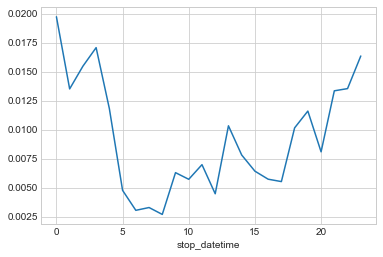

In [357]:
police_df.groupby(police_df['stop_datetime'].dt.hour)['drugs_related_stop'].mean().plot()

### Count drugs_related_stop by hour

In [358]:
police_df.groupby(police_df['stop_datetime'].dt.hour)['drugs_related_stop'].sum()

stop_datetime
0     103
1      60
2      46
3      20
4       3
5       1
6      10
7      15
8      14
9      43
10     42
11     41
12     16
13     50
14     44
15     31
16     22
17     16
18     22
19     30
20     27
21     20
22     47
23     92
Name: drugs_related_stop, dtype: int64

<AxesSubplot:xlabel='stop_datetime'>

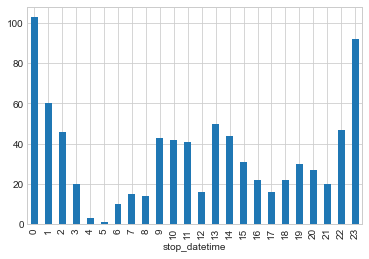

In [394]:
police_df.groupby(police_df['stop_datetime'].dt.hour) \
    .drugs_related_stop \
    .sum().plot(kind='bar')

<AxesSubplot:xlabel='stop_datetime'>

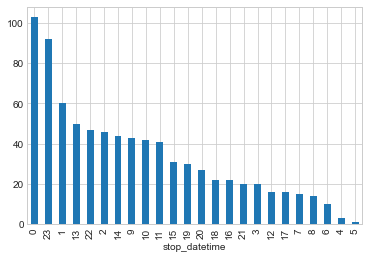

In [396]:
police_df.groupby(police_df['stop_datetime'].dt.hour) \
    .drugs_related_stop \
    .sum() \
    .sort_values(ascending=False) \
    .plot(kind='bar')

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

In [360]:
generate_markdown_text('7.What time do stops take place?')

'7. [What time do stops take place?](#-7.What-time-do-stops-take-place?)'

## 7.What time do stops take place?

In [361]:
police_df.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

<AxesSubplot:>

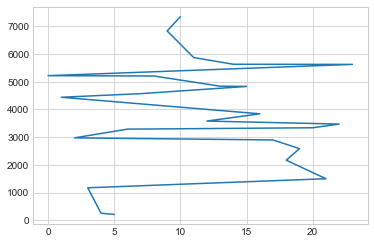

In [362]:
police_df.stop_datetime.dt.hour.value_counts().plot()

In [363]:
police_df.stop_datetime.dt.hour \
    .value_counts() \
    .sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

<AxesSubplot:>

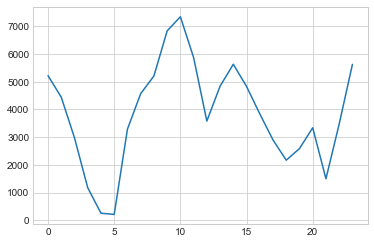

In [364]:
police_df.stop_datetime.dt.hour \
    .value_counts() \
    .sort_index() \
    .plot()

### Alternative Method

In [365]:
police_df.groupby(police_df.stop_datetime.dt.hour) \
        .count() \
        .head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
stop_datetime,,,,,,,,,,,,,,,
0,5221,5221,4853,4857,4840,4853,4853,4853,5221,312,4853,4853,4853,5221,5221
1,4442,4442,4021,4021,4012,4021,4021,4021,4442,276,4021,4021,4021,4442,4442
2,2975,2975,2718,2718,2715,2718,2718,2718,2975,171,2718,2718,2718,2975,2975
3,1172,1172,1071,1072,1068,1071,1071,1071,1172,69,1071,1071,1071,1172,1172
4,254,254,216,216,216,216,216,216,254,9,216,216,216,254,254


<AxesSubplot:xlabel='stop_datetime'>

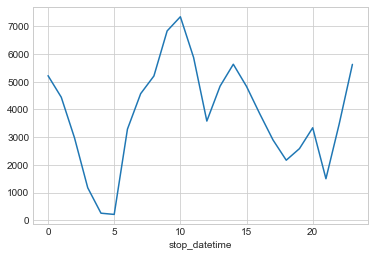

In [366]:
police_df.groupby(police_df.stop_datetime.dt.hour)  \
    .stop_date  \
    .count()    \
    .plot()

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

In [367]:
generate_markdown_text('8.Replace the ambiguous data in stop_duration column with np.nan.')

'8. [Replace the ambiguous data in stop_duration column with np.nan.](#-8.Replace-the-ambiguous-data-in-stop_duration-column-with-np.nan.)'

### 8.Replace the ambiguous data in stop_duration column with np.nan.

In [368]:
police_df.shape

(91741, 15)

### Find the null count

In [369]:
police_df.stop_duration.isna().sum()

5333

### Null values are excluded in value counts by default.

In [370]:
police_df.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [371]:
police_df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

### Two columns are labeled as `1` and `2`. Query these columns. 

In [372]:
police_df.query('stop_duration == "1" or stop_duration == "2" ')

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
55873,2012-01-23,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,2012-01-23 11:17:00
76624,2014-04-13,08:34,F,1965.0,49.0,White,Speeding,Speeding,False,NaN,Citation,False,1,False,2014-04-13 08:34:00


### i.Using loc method.

In [373]:
police_df.loc[(police_df.stop_duration == "1") | (police_df.stop_duration == "2")]

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_datetime
55873,2012-01-23,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,NaN,Arrest Passenger,True,2,False,2012-01-23 11:17:00
76624,2014-04-13,08:34,F,1965.0,49.0,White,Speeding,Speeding,False,NaN,Citation,False,1,False,2014-04-13 08:34:00


### Set the stop_duration value of these rows as missing - `NaN`.

In [374]:
erronous_rows = police_df.query('stop_duration == "1" or stop_duration == "2" ')
erronous_rows.stop_duration = 'NaN'

/var/folders/2w/g1xqblv11xdc789plh7y3tsw0000gn/T/ipykernel_9139/1244679972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  erronous_rows.stop_duration = 'NaN'


### Must overwrite the existing df to solve the `SettingWithCopyWarning` warning.

In [375]:
police_df.loc[(police_df.stop_duration == "1") | (police_df.stop_duration == "2"), 'stop_duration'] = 'NaN'

police_df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

### Now there are two different sets of NaN values. This is because `'NaN' != numpy.nan`. Replace the "NaN" with np.nan. 

In [376]:
police_df.loc[police_df.stop_duration == "NaN", 'stop_duration'] = np.nan

police_df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

### ii.Using replace.

In [377]:
police_df.stop_duration.replace(["1", "2"], value=np.nan, inplace=True)

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

### 9.Find the average stop_duration for each violation.

In [378]:
police_df.groupby('violation_raw').stop_duration.value_counts()

violation_raw                     stop_duration
APB                               0-15 Min            37
                                  16-30 Min           24
                                  30+ Min             18
Call for Service                  0-15 Min           547
                                  16-30 Min          435
                                  30+ Min            316
Equipment/Inspection Violation    0-15 Min          9173
                                  16-30 Min         1373
                                  30+ Min            474
Motorist Assist/Courtesy          0-15 Min           119
                                  16-30 Min           59
                                  30+ Min             25
Other Traffic Violation           0-15 Min         11763
                                  16-30 Min         3150
                                  30+ Min           1310
Registration Violation            0-15 Min          2421
                                  16-30 

### Issue: Unable to use any aggregation beause the stop_duration column values are of String type.
- `Solution:` Create a new column titled `avg_stop_minutes` using the average stop_duration values. 

In [379]:
police_df.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
Name: stop_duration, dtype: int64

In [380]:
mapping = {'0-15 Min': 8,
           '16-30 Min': 16,
           '30+ Min': 45}

police_df['avg_stop_minutes'] = police_df.stop_duration.map(mapping)

police_df.avg_stop_minutes.value_counts()

8.0     69543
16.0    13635
45.0     3228
Name: avg_stop_minutes, dtype: int64

In [381]:
police_df.groupby('violation_raw').avg_stop_minutes.value_counts()

violation_raw                     avg_stop_minutes
APB                               8.0                    37
                                  16.0                   24
                                  45.0                   18
Call for Service                  8.0                   547
                                  16.0                  435
                                  45.0                  316
Equipment/Inspection Violation    8.0                  9173
                                  16.0                 1373
                                  45.0                  474
Motorist Assist/Courtesy          8.0                   119
                                  16.0                   59
                                  45.0                   25
Other Traffic Violation           8.0                 11763
                                  16.0                 3150
                                  45.0                 1310
Registration Violation            8.0            

In [382]:
police_df.groupby('violation_raw').avg_stop_minutes.mean()

violation_raw
APB                                 18.860759
Call for Service                    19.688752
Equipment/Inspection Violation      10.588203
Motorist Assist/Courtesy            14.881773
Other Traffic Violation             12.541084
Registration Violation              12.105769
Seatbelt Violation                   9.151084
Special Detail/Directed Patrol      13.313238
Speeding                             9.588544
Suspicious Person                   17.125000
Violation of City/Town Ordinance    11.364929
Warrant                             18.600000
Name: avg_stop_minutes, dtype: float64

### Use `count` with meaningless mean data.

In [383]:
police_df.groupby('violation_raw').avg_stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,18.860759,79
Call for Service,19.688752,1298
Equipment/Inspection Violation,10.588203,11020
Motorist Assist/Courtesy,14.881773,203
Other Traffic Violation,12.541084,16223
Registration Violation,12.105769,3432
Seatbelt Violation,9.151084,2952
Special Detail/Directed Patrol,13.313238,2455
Speeding,9.588544,48462


### 10.Plot the findings.

<AxesSubplot:xlabel='violation_raw'>

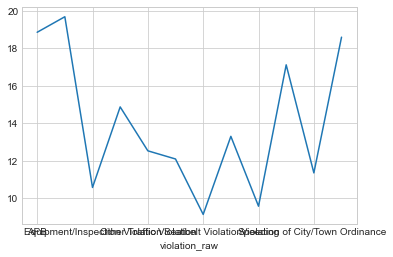

In [384]:
police_df.groupby('violation_raw').avg_stop_minutes \
    .mean() \
    .plot()

### Don't use a line plot to compare categories!

<AxesSubplot:xlabel='violation_raw'>

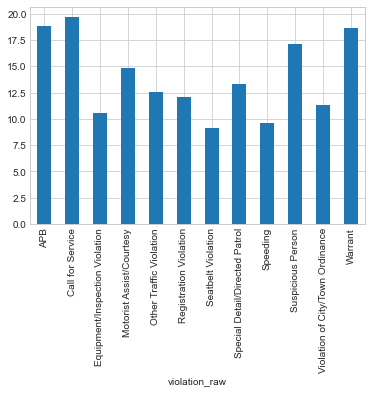

In [385]:
police_df.groupby('violation_raw').avg_stop_minutes \
    .mean() \
    .plot(kind='bar')

<AxesSubplot:ylabel='violation_raw'>

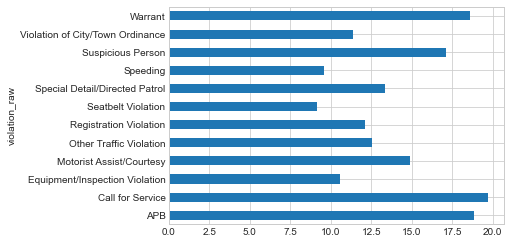

In [386]:
police_df.groupby('violation_raw').avg_stop_minutes \
    .mean() \
    .plot(kind='barh')

### `Sort_values()`

<AxesSubplot:ylabel='violation_raw'>

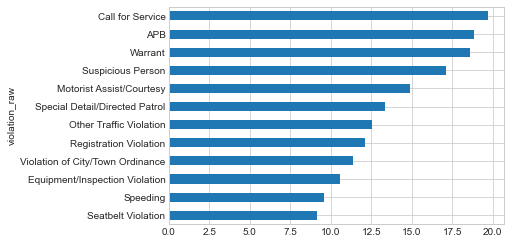

In [387]:
police_df.groupby('violation_raw').avg_stop_minutes \
    .mean() \
    .sort_values()  \
    .plot(kind='barh')

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis

## 11.Compare the aget distributions for each violation.

In [388]:
police_df.violation.value_counts(dropna=False)

Speeding               48463
Moving violation       16224
Equipment              11020
NaN                     5333
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [389]:
police_df.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


### `Histograms` are excellent for displaying distributions.

<AxesSubplot:ylabel='Frequency'>

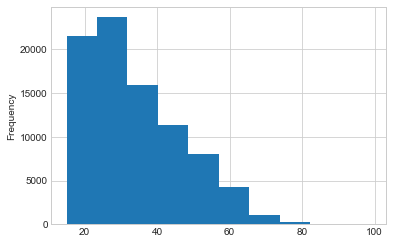

In [390]:
police_df.driver_age.plot(kind='hist')

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

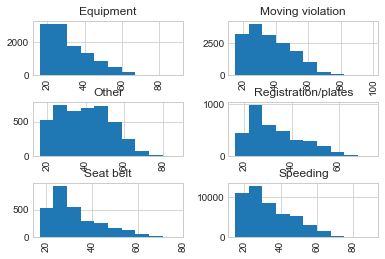

In [391]:
police_df.hist('driver_age', by='violation')

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

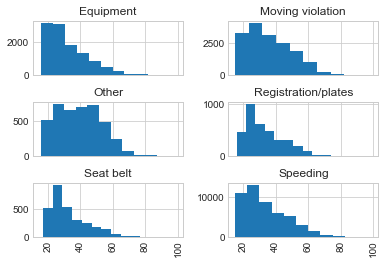

In [392]:
police_df.hist('driver_age', by='violation', sharex=True)

array([[<AxesSubplot:title={'center':'Equipment'}>,
        <AxesSubplot:title={'center':'Moving violation'}>],
       [<AxesSubplot:title={'center':'Other'}>,
        <AxesSubplot:title={'center':'Registration/plates'}>],
       [<AxesSubplot:title={'center':'Seat belt'}>,
        <AxesSubplot:title={'center':'Speeding'}>]], dtype=object)

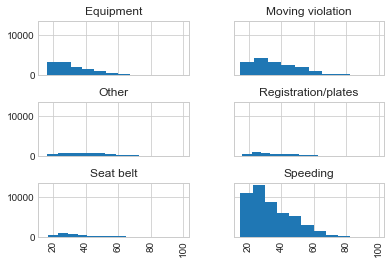

In [393]:
police_df.hist('driver_age', by='violation', sharex=True, sharey=True)

[BACK TO TOP][def]

[def]: ##-Standford-Open-Policing-Project-Data-Analysis